In [1]:
# Instacart Market Basket Analysis


<b> Introduction</b>

This project explores customer purchasing behavior using a public dataset from Instacart, an online grocery delivery service. We aim to uncover patterns that shed light on when people order, what they order, and how they shop. Specifically, we investigate:


-What time of day orders are typically placed


-Which products are most commonly purchased and reordered


-How items are added to the cart—i.e., what comes first and what follows


-And trends in order frequency per user


Through this analysis, we gain insights into consumer habits that could help optimize recommendations, inventory management, and marketing strategies for e-commerce retailers.
</div



## Importing the required libraries

In [2]:
# Import the libraries you'll need for this analysis
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the datasets
# Note: These files use semicolon (;) as the separator instead of comma
orders         = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products       = pd.read_csv('/datasets/products.csv', sep=';')
departments    = pd.read_csv('/datasets/departments.csv', sep=';')
aisles         = pd.read_csv('/datasets/aisles.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

## Analyze your data

In the cells below, display the datasets using `.info()` and `.head()` to gain insights into their structure and content.

- `.info()`: Provides a concise summary of the dataset, including the data types, non-null counts, and memory usage.
- `.head()`: Displays the first few rows of the dataset, offering a quick overview of the data values.

In [4]:
# In this cell, type "orders" below this line and execute the cell
orders


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [5]:
# In this cell, type "products" below this line and execute the cell
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Repeat this process for each dataset to understand the structure, including the types of columns and rows they contain. Add additional code cells as needed for your analysis.

In [6]:
# departments insights
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [7]:
# aisles insights 
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [8]:
#order_products insights

order_products


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [9]:
# In this cell, type "orders.info() below this line and execute the cell
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


The "Non-Null Count" column provides information about any missing values in each column of the dataset. With a total of 478,952 entries, observe any columns where the non-null count is less than this number to identify missing values.

In [10]:
# In this cell, run orders_products.info() below, but include the argument show_counts=True since this is a large file.
order_products.info(show_counts=True) 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


Repeat the use of .info() on the remaining datasets to identify missing values and understand their structure. Check the "Non-Null Count" for each dataset to spot any columns with missing values.

In [11]:
#info in products
products.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [12]:
#info in departments
departments.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [13]:
#info in aisles
aisles.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


## Find and Remove Missing Values

We noticed that some columns contain missing values.

Here are some useful code snippets:

```python
# Identify missing values in each column
print(dataset.isnull().sum())

# Display rows where a specific column has missing values
print(dataset[dataset['column_name'].isna()])

# Confirm no missing values remain
print(dataset.isnull().sum())
```

### `products` Data Frame

We will begin by addressing the missing values in the `products` data frame.

In [14]:
# Display rows where the product_name column has missing values
print(products[products['product_name'].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


It seems suspicious that all rows with missing `product_name` might be associated with `aisle_id` 100 and `department_id` 21. Let’s verify this by checking if any rows with missing `product_name` have an `aisle_id` different from 100 and 21. This will help us confirm if the issue is isolated to this aisle or spread across others.

In [15]:
# Combine conditions to check for missing product names in aisles other than 100

missing_product_non_100 = products[products['product_name'].isna() & ((products['aisle_id'] != 100))]
missing_product_non_100



,product_id,product_name,aisle_id,department_id


In [16]:
# Combine conditions to check for missing product names in aisles other than 21
missing_product_non_21 = products[products['product_name'].isna() & ((products['department_id'] != 21))]
missing_product_non_21


,product_id,product_name,aisle_id,department_id


To better understand the missing product_name values, let’s determine what department_id 21 and aisle_id 100 represent by referencing the departments and aisles tables.

In [17]:
# What is this aisle and department?

print(departments.loc[departments['department_id'] == 21, 'department'].values[0])
print(aisles.loc[aisles['aisle_id'] == 100, 'aisle'].values[0])



missing
missing


In [18]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
# Confirm no missing values remain
print(products['product_name'].isnull().sum())


0


### `orders` data frame

Now let's fill in missing values from the `orders` table.

In [19]:
# Display rows where the days_since_prior_order column has missing values
print(orders[orders['days_since_prior_order'].isna()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

In [20]:
# Are there any missing values where it's not a customer's first order?
missing_first_order= orders[orders['days_since_prior_order'].isna() & ((orders['order_number'] != 1))]
missing_first_order

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


All of the missing `'days_since_prior_order'` values correspond to a customer's first ever order. This makes sense because there is no prior order! We'll leave the values as `NaN` so the column can remain numeric. Also, the `NaN` values shouldn't interfere with any calculations we might do using this column.

### `order_products` data frame

Now let's fill in missing values from the order_products table.

In [21]:
# Display rows where the add_to_cart_order column has missing values
print(order_products[order_products['add_to_cart_order'].isna()])

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [22]:
# Use .min() and .max() to find the minimum and maximum values for this column.
print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())



1.0
64.0


In [23]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_cart = order_products.loc[order_products['add_to_cart_order'].isna()]
print(missing_cart)



         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [25]:
# Do all orders with missing values have more than 64 products?

# order_ids with NaN in add_to_cart_order
missing_cart_orders = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()

# Get all rows for those orders
missing_orders_df = order_products[order_products['order_id'].isin(missing_cart_orders)]

#Count the number of items per order
item_counts = missing_orders_df.groupby('order_id').size().sort_values(ascending=False)

# Print or analyze the result
print(item_counts)

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
888470      65
1598369     65
747668      65
1677118     65
9310        65
Length: 70, dtype: int64


In [26]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna('999').astype('int')
# Confirm no missing values remain
print(products['product_name'].isnull().sum())

0


For some reason, any item placed in the cart 65th or later has a missing value in the `'add_to_cart_order'` column. Maybe the data type of that column in the database could only hold integer values from 1 to 64. We've decided to replace the missing values with a code value, 999, that represents an unknown placed in cart order above 64. We also converted the column to integer data type. We just need to be careful to remember this if we perform calculations using this column during our analysis.

Other sensible code values we could've used are 0 or -1 because they don't show up elsewhere in the dataset and they don't have any real physical meaning for this variable.

Also note that, for orders with exactly 65 items, we could replace the missing value with 65. But we're going to neglect that for now since we can't determine the 65th item for all orders with 66 items or more.

## Find and Remove Duplicate Values from All the Datasets

Each dataset may contain duplicate rows, which can lead to redundancy and affect the accuracy of our analysis. To handle this:

1. Use the `.duplicated()` method to identify duplicate rows. This method returns a Boolean series where `True` indicates a duplicate row.
2. Apply the `.drop_duplicates()` method to remove these duplicate rows, ensuring a cleaner dataset.
3. Optionally, you can set the `keep` parameter in `.drop_duplicates()` to specify which duplicate to retain (`'first'` or `'last'`).

Here is some example code for reference:
```python
# Check for duplicates
print(dataset.duplicated().sum())  # Number of duplicate rows

# View duplicate rows
print(dataset[dataset.duplicated()]

# Remove duplicates
dataset = dataset.drop_duplicates().reset_index(drop=True)

# Confirm removal
print(dataset.duplicated().sum())  # Should return 0
```

Repeat this process for all datasets to ensure they are free of duplicate rows.

### `orders` data frame

In [27]:
# Find the number of duplicate rows in the orders dataframe
print(orders.duplicated().sum())

15


In [28]:
# View the duplicate rows
print(orders[orders.duplicated()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

In [29]:
# Remove duplicate orders
orders = orders.drop_duplicates().reset_index(drop=True)

In [30]:
# Double check for duplicate rows
print(orders.duplicated().sum())

0


### `products` data frame

In [31]:
# Check for fully duplicate rows

print(products.duplicated().sum())
print()
print(products[products.duplicated()])


0

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [32]:

# Check for just duplicate product IDs using subset='product_id' in duplicated()
print(products.duplicated(subset='product_id').sum())
print()
print(products[products.duplicated(subset='product_id')])



0

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Hint: To identify duplicate product names more effectively, convert the names to lowercase for consistent comparison. Use the .str.lower() method on the product_name column to standardize the text before checking for duplicates.

In [33]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name']=products['product_name'].str.lower()
print(products['product_name'].duplicated().sum())
print()
print(products[products['product_name'].duplicated()])

1361

       product_id                                     product_name  aisle_id  \
71             72                                          unknown       100   
109           110                                          unknown       100   
296           297                                          unknown       100   
416           417                                          unknown       100   
436           437                                          unknown       100   
...           ...                                              ...       ...   
49689       49690                    high performance energy drink        64   
49690       49691                    original pancake & waffle mix       130   
49691       49692  organic instant oatmeal light maple brown sugar       130   
49692       49693                           spring water body wash       127   
49693       49694                          burrito- steak & cheese        38   

       department_id  
71        

Let's see what that looks like in our dataset :

In [34]:
products[products['product_name'].str.lower() == 'high performance energy drink']

,product_id,product_name,aisle_id,department_id
22540,22541,high performance energy drink,64,7
49689,49690,high performance energy drink,64,7


In [35]:
# Drop duplicate product names (case insensitive)
products = products.drop_duplicates(subset='product_name')

print(products.duplicated(subset='product_name').sum())


0


### `departments` data frame

In [36]:
# Check for duplicate entries in the departments dataframe
departments[departments.duplicated()]

,department_id,department


### `aisles` data frame

In [37]:
# Check for aisles entries in the departments dataframe
aisles[aisles.duplicated()]

,aisle_id,aisle


### `order_products` data frame

In [38]:
# Check for duplicate entries in the order_products dataframe
order_products[order_products.duplicated()]

,order_id,product_id,add_to_cart_order,reordered


We have now successfully cleaned our data. Let's begin our exploratory data analysis.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

To verify that the values in the `order_hour_of_day` and `order_dow` columns are sensible:

1. **Check unique values**: Use `.unique()` on each column to extract all distinct values present.
2. **Sort the results**: Use `sorted()` to arrange the unique values in ascending order for easier verification.
3. **Validate ranges**:
   - Ensure `order_hour_of_day` values range from 0 to 23 (representing hours of the day).
   - Ensure `order_dow` values range from 0 to 6 (representing days of the week).

This process confirms that the data aligns with expected ranges and there are no out-of-bound or invalid entries.

In [39]:
#check unique values for order_hour_of_day 

print(f"Range order_hour_of_day: {sorted(orders['order_hour_of_day'].unique())}")




Range order_hour_of_day: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [40]:
#check unique values for order_dow
print(f"Range order_dow: {sorted(orders['order_dow'].unique())}")

Range order_dow: [0, 1, 2, 3, 4, 5, 6]


### [A2] What time of day do people shop for groceries?

To determine the time of day people shop for groceries, analyze the order_hour_of_day column in the orders dataset. Use .value_counts() to count the number of orders placed at each hour, and then sort the results by the hour for a clear chronological order.

Finally, visualize the data with a bar plot to easily observe the shopping trends across different times of the day.

0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64


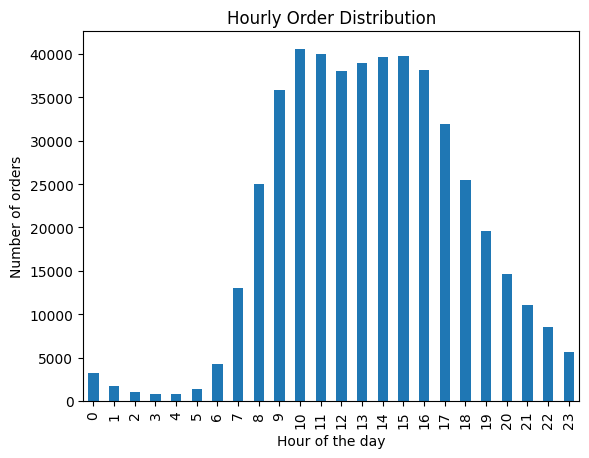

In [41]:
#Count and sort order_hour_of_day - check information
order_times= orders['order_hour_of_day'].value_counts().sort_index()
print(order_times)

#Create plot
from matplotlib import pyplot as ord_times

order_times.plot(title="Hourly Order Distribution",
                kind= 'bar',
                xlabel="Hour of the day",
                ylabel="Number of orders"
                )
ord_times.show()

Most orders occur between 9:00 AM and 5:00 PM, with peaks at 10:00 AM and 3:00 PM

### [A3] What day of the week do people shop for groceries?

To figure out what day of the week people shop for groceries, analyze the order_dow column in the orders dataset. Use .value_counts() to count the number of orders for each day of the week, and then sort the results by the day index to maintain the correct order.

Visualize the data with a bar plot to clearly observe shopping patterns across the days of the week.

0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64


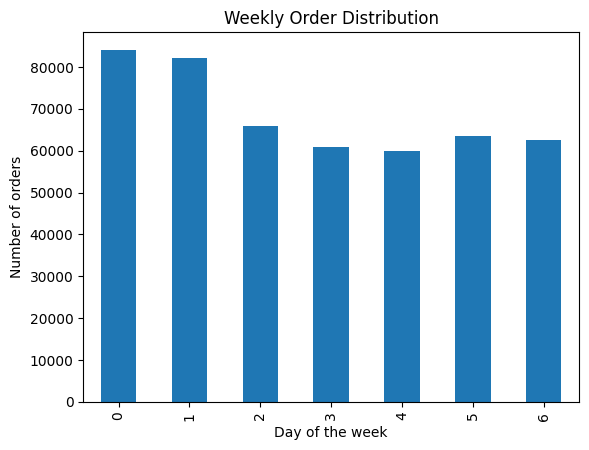

In [42]:
#Count and sort order_dow - check information
order_days= orders['order_dow'].value_counts().sort_index()
print(order_days)

#Create plot
from matplotlib import pyplot as ord_days

order_days.plot(title="Weekly Order Distribution",
                kind= 'bar',
                xlabel="Day of the week",
                ylabel= "Number of orders"
                )
ord_times.show()


The data dictionary does not state which integer corresponds to which day of the week. Assuming Sunday = 0, then people place more orders at the beginning of the week (Sunday and Monday).

### [A4] How long do people wait until placing another order?

To understand how long people wait before placing another order, analyze the days_since_prior_order column in the orders dataset. Use .value_counts() to count how many orders were placed for each interval of days, then sort the results by the number of days for clarity.

Visualize the data using a bar plot to observe patterns in ordering frequency over time.

0.0      9589
1.0     20179
2.0     27138
3.0     30224
4.0     31006
5.0     30096
6.0     33930
7.0     44577
8.0     25361
9.0     16753
10.0    13309
11.0    11467
12.0    10658
13.0    11737
14.0    13992
15.0     9416
16.0     6587
17.0     5498
18.0     4971
19.0     4939
20.0     5302
21.0     6448
22.0     4514
23.0     3337
24.0     3015
25.0     2711
26.0     2640
27.0     2986
28.0     3745
29.0     2673
30.0    51337
Name: days_since_prior_order, dtype: int64


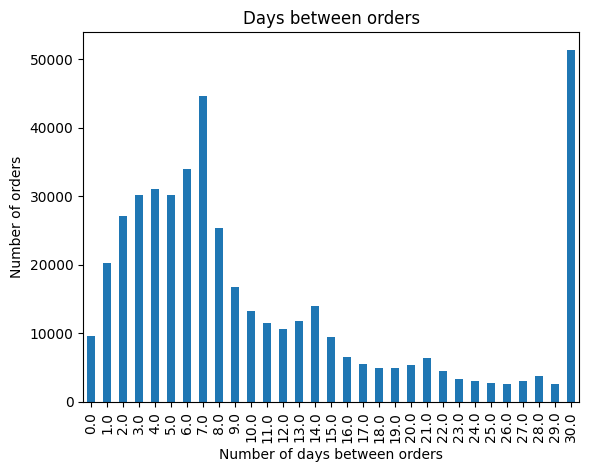

In [43]:
#Count and sort days_since_prior_order - check information
reorder_days= orders['days_since_prior_order'].value_counts().sort_index()
print(reorder_days)

#Create Plot
from matplotlib import pyplot as reord_days

reorder_days.plot(title="Days between orders",
                kind= 'bar',
                xlabel="Number of days between orders",
                ylabel= "Number of orders"
                )
ord_times.show()


The 0 values probably correspond to customers who placed more than one order on the same day.

The max value of 30 days and the high spike at that value is puzzling though. The spike might be explained by people who set up recurring subscriptions to automatically order once a month. But that doesn't explain why there are no values above 30 days. I would expect many customers to place orders less often than once a month. Maybe those customers were intentionally excluded from the dataset.

Disregarding the spike at 30 days, most people wait between 2 to 10 days in between orders. The most common wait time is 7 days. In other words, it's common for people to place weekly grocery orders. Interestingly, in the tail of the distribution we also see small spikes at 14, 21, and 28 days. These would correspond to orders every 2, 3, or 4 weeks.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the bar charts for both days and describe the differences that you see.

To determine if there's a difference in the `order_hour_of_day` distributions on Wednesdays and Saturdays, follow these steps:

1. **Create masks** for Wednesday (`order_dow == 3`) and Saturday (`order_dow == 6`) to filter the orders data.
2. **Count the order hours** for each day using `.value_counts()` and sort them by hour with `.sort_index()` for clarity.
3. **Combine the counts** for both days into a single DataFrame using `pd.concat()`, and label the columns for easier interpretation.

After preparing the data, plot bar charts for both days to visually compare the distribution of order times. Look for patterns such as peaks or differences in the busiest times throughout the day.

 In Markdown with LaTeX, you can write

In [44]:
#Masks for Wednesday (wed) and Saturday (sat)

wed_order_dist= orders[orders['order_dow'] == 3]
sat_order_dist= orders[orders['order_dow'] == 6]


In [45]:
#Count the order hours & print to check
wed_order_dist= wed_order_dist['order_hour_of_day'].value_counts().sort_index()
print(wed_order_dist)

sat_order_dist= sat_order_dist['order_hour_of_day'].value_counts().sort_index()
print(sat_order_dist)


0      373
1      215
2      106
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: order_hour_of_day, dtype: int64
0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: order_hour_of_day, dtype: int64


In [46]:
#combine counts using concat
combined = pd.concat([wed_order_dist, sat_order_dist], axis=1)

# Rename columns 
combined.columns = ['Wednesday', 'Saturday']


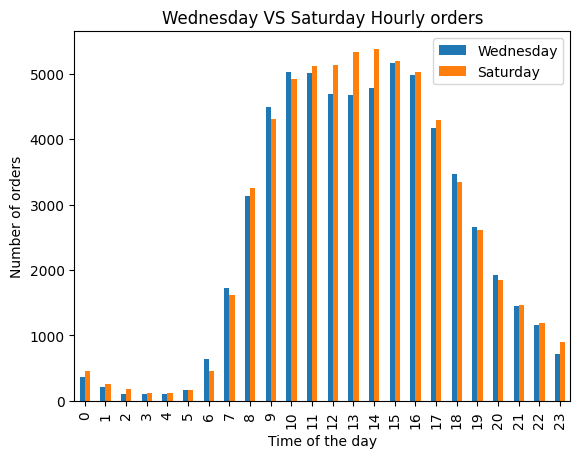

Wednesday and Saturday have similar patterns of orders through the day. The biggest difference is between 12h and 14h where on Saturday the ammount of orders is higher. This can be attributed to lunch periods


In [47]:
#Create plot and write comments
from matplotlib import pyplot as we_sa_comp
combined.plot(title= 'Wednesday VS Saturday Hourly orders',
              kind='bar',
              xlabel="Time of the day",
              ylabel= "Number of orders",
              legend= True
             )

we_sa_comp.show()

print('Wednesday and Saturday have similar patterns of orders through the day. The biggest difference is between 12h and 14h where on Saturday the ammount of orders is higher. This can be attributed to lunch periods')

There's a small dip from 11h to 13h on Wednesdays. This dip is absent on Saturdays. Maybe this dip can be attributed to people who don't use Instacart because they have lunch somewhere between 11h and 13h.

### [B2] What's the distribution for the number of orders per customer?

To explore the distribution of the number of orders per customer:

1. **Group the data** by `user_id` to calculate the total number of orders for each customer. Use `.groupby('user_id')` and count the `order_id` for each group.
2. **Sort the results** using `.sort_values()` for better readability.
3. **Visualize the distribution** using a histogram to observe how many orders most customers typically place.

Adjust the number of bins in the histogram to refine the visualization and better capture the pattern.

In [48]:
#group and sort- how many orders does each user place
user_order_counts = orders.groupby('user_id')['order_id'].count()
user_order_counts= user_order_counts.sort_values()
print(user_order_counts)
print()
#How many users place 'x' ammount of orders 
orders_per_user_counts = user_order_counts.value_counts().sort_index()
print(orders_per_user_counts)



user_id
152331     1
139876     1
60408      1
139873     1
139871     1
          ..
66664     24
148162    24
78375     25
193164    26
149605    28
Name: order_id, Length: 157437, dtype: int64

1     55357
2     36508
3     21547
4     13498
5      8777
6      6012
7      4240
8      3019
9      2152
10     1645
11     1308
12      947
13      703
14      512
15      437
16      263
17      184
18      121
19       85
20       52
21       22
22       23
23       19
24        3
25        1
26        1
28        1
Name: order_id, dtype: int64


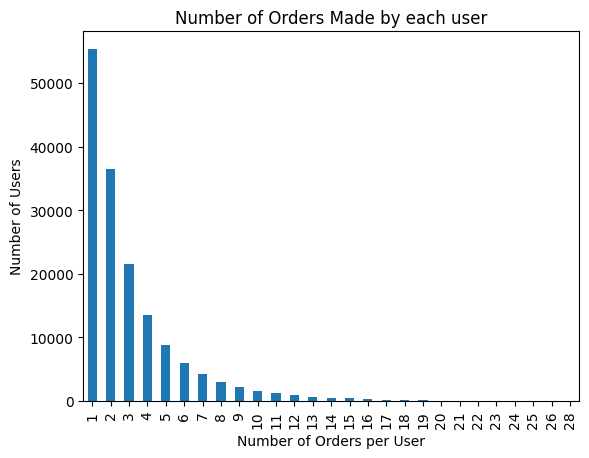

In [49]:
from matplotlib import pyplot as plt
#convert to df
df_orders_per_user = orders_per_user_counts.reset_index()
df_orders_per_user.columns = ['orders_per_user_count', 'user_count']

#create plot
df_orders_per_user.plot(
    x='orders_per_user_count',
    y='user_count',
    kind='bar',
    title='Number of Orders Made by each user',
    xlabel='Number of Orders per User',
    ylabel='Number of Users',
    legend=False
    )

plt.show()


Most customers in the dataset have placed between 1 and 10 orders, with number of orders per customer sharply decreasing after just 1 order.

### [B3] What are the top 20 popular products (display their id and name)?

To identify the top 20 most popular products:

1. **Merge the datasets**: Combine `order_products` and `products` on `product_id` to access both the product IDs and names in a single DataFrame.
2. **Group the data**: Group by both `product_id` and `product_name` to aggregate the order counts for each product using `.size()`.
3. **Sort the results**: Use `.sort_values(ascending=False)` to rank products by their popularity.
4. **Display the top 20**: Use `.head(20)` to focus on the most frequently ordered products.
5. **Visualize the results**: Create a bar chart to highlight the top products and their order counts.

This will give you a clear view of the most popular products and their ranking.


In [50]:
#merge datasets order_products and products on product_id

merge_prod= order_products.merge(products,on='product_id')
#print head
print(merge_prod.head())


   order_id  product_id  add_to_cart_order  reordered  \
0   2141543       11440                 17          0   
1    147172       11440                  7          1   
2   3341719       11440                  4          1   
3   1938779       11440                  8          1   
4   1728338       11440                 23          0   

                     product_name  aisle_id  department_id  
0  chicken breast tenders breaded       129              1  
1  chicken breast tenders breaded       129              1  
2  chicken breast tenders breaded       129              1  
3  chicken breast tenders breaded       129              1  
4  chicken breast tenders breaded       129              1  


In [51]:
#group the data product_id and product_name
prod_grp=merge_prod.groupby(['product_id','product_name']).size()
#sort
grp_sorted=prod_grp.sort_values(ascending=False)
#display top 20
grp_sort_20 = grp_sorted.head(20)
print(grp_sort_20)

product_id  product_name            
24852       banana                      66050
13176       bag of organic bananas      53297
21137       organic strawberries        37039
21903       organic baby spinach        33971
47209       organic hass avocado        29773
47766       organic avocado             24689
47626       large lemon                 21495
16797       strawberries                20018
26209       limes                       19690
27845       organic whole milk          19600
27966       organic raspberries         19197
22935       organic yellow onion        15898
24964       organic garlic              15292
45007       organic zucchini            14584
39275       organic blueberries         13879
49683       cucumber kirby              13675
28204       organic fuji apple          12544
5876        organic lemon               12232
8277        apple honeycrisp organic    11993
40706       organic grape tomatoes      11781
dtype: int64


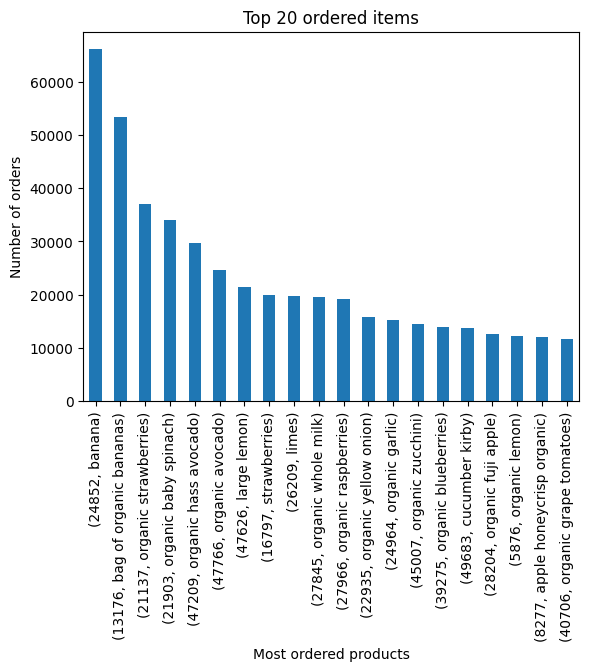

In [52]:
#Bar chart


from matplotlib import pyplot as top20
grp_sort_20.plot(title= 'Top 20 ordered items',
                kind='bar',
                xlabel="Most ordered products",
                ylabel= "Number of orders",
                )
top20.show()



The top 20 items are all produce, except for the milk. Looks like people want delicious and nutritious!

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?
To analyze how many items people typically buy in one order:

1. **Group the data** by `order_id` and count the number of products (`product_id`) in each order using `.count()`. This gives the number of items in each order.
2. **Aggregate the counts**: Use `.value_counts()` to determine how frequently different order sizes occur, and then sort the results with `.sort_index()` to organize by the number of items.
3. **Visualize the distribution**: Use a bar plot to show the frequency of orders for each size, with the x-axis representing the number of items and the y-axis representing the number of orders.

This will help you understand the typical size of a grocery order and identify any trends in purchasing behavior.

In [53]:
#group by order_id - how many products on each order
prod_grp= order_products.groupby(['order_id'])['product_id'].count()
print(prod_grp)
print()
#Value counts and sort - how frequently order sixe happens
freq_ord_size= prod_grp.value_counts().sort_index()
print(freq_ord_size)

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64

1      21847
2      26292
3      29046
4      31054
5      31923
       ...  
98         1
104        1
108        1
115        1
127        1
Name: product_id, Length: 90, dtype: int64


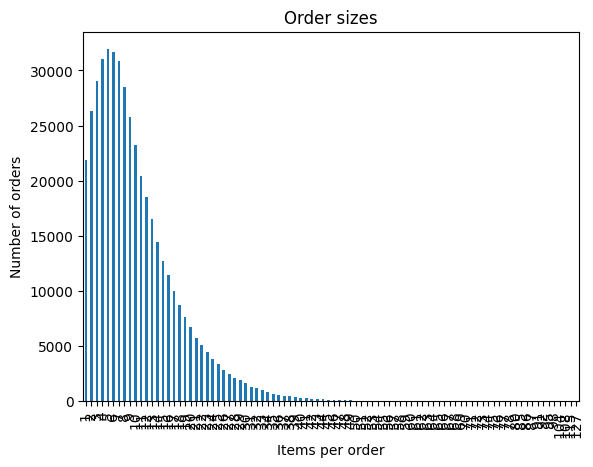

In [54]:
from matplotlib import pyplot as freq
#create df from freq_ord_size
df_freq_ord_size = freq_ord_size.reset_index()
df_freq_ord_size.columns = ['items_per_ord', 'number_of_orders']

#create plot

df_freq_ord_size.plot(x= 'items_per_ord',
                      y= 'number_of_orders',
                      title= 'Order sizes',
                      kind='bar',
                      xlabel="Items per order",
                      ylabel= "Number of orders",
                      legend= False
                      )

freq.show()

Most of the order numbers are in the tail of the distribution. To get a better look at the non-tail part, let's choose a value in the tail as a cutoff and just plot order with fewer than that many items. An order size of 35 items is far enough into the tail for this.

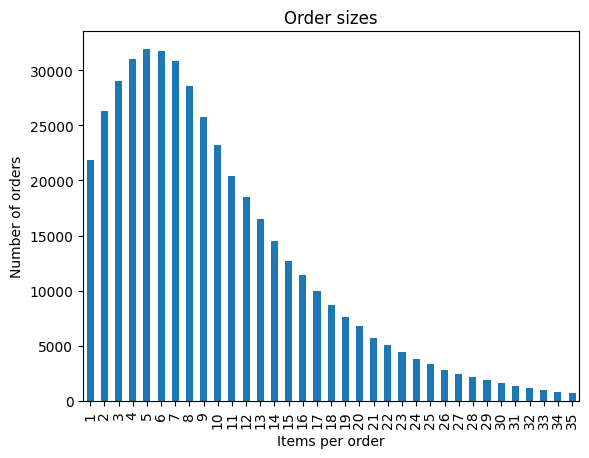

In [55]:
#find orders from 1 to 35 items
df_top_35 = df_freq_ord_size.head(35)


#re do the bar plot
df_top_35.plot(x= 'items_per_ord',
                      y= 'number_of_orders',
                      title= 'Order sizes',
                      kind='bar',
                      xlabel="Items per order",
                      ylabel= "Number of orders",
                      legend= False,
                      )


freq.show()

The typical order contains 5 or 6 items, with most orders having between 1 and 20 items.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

To find the top 20 most frequently reordered items:

1. **Filter the data**: Use `order_products['reordered'] == 1` to isolate only the products that have been reordered.
2. **Merge the datasets**: Combine the filtered `order_products` with the `products` dataset on `product_id` to get both the product names and IDs.
3. **Group the data**: Group by both `product_id` and `product_name` to calculate how many times each product was reordered, using `.size()`.
4. **Sort the results**: Use `.sort_values(ascending=False)` to rank the products by reorder frequency.
5. **Display the top 20**: Use `.head(20)` to focus on the most frequently reordered products.
6. **Visualize the data**: Create a bar chart to showcase the top reordered items and their frequencies.

This process highlights the products that customers consistently return to and reorder.

In [56]:
# isolate data - what products have been reordered
reorder_prods = order_products[order_products['reordered'] == 1]

# Merge with products on product_id
reordered_merged = reorder_prods.merge(products, on='product_id', how='inner')

print(reordered_merged)

         order_id  product_id  add_to_cart_order  reordered  \
0          567889        1560                  1          1   
1          761899        1560                  2          1   
2         1388514        1560                  8          1   
3         2629631        1560                  1          1   
4          866921        1560                  6          1   
...           ...         ...                ...        ...   
2674347   1338379       33506                  3          1   
2674348    191894       27878                  3          1   
2674349   3041739       31751                 14          1   
2674350    949244       24384                 18          1   
2674351   1078099       47673                 11          1   

                                              product_name  aisle_id  \
0                                               bag of ice        37   
1                                               bag of ice        37   
2                          

In [57]:
#group product_id and product_name
grp_reord= reordered_merged.groupby(['product_id','product_name']).size()
#sort
grp_reord= grp_reord.sort_values(ascending=False)
print(grp_reord)


product_id  product_name                                             
24852       banana                                                       55763
13176       bag of organic bananas                                       44450
21137       organic strawberries                                         28639
21903       organic baby spinach                                         26233
47209       organic hass avocado                                         23629
                                                                         ...  
28081       whole wheat with white cheddar filling cracker sandwiches        1
28084       cote d azur french milled oval bar soap                          1
28089       rolled hot cereal 5 grain                                        1
28112       hickory &  brown sugar barbecue sauce                            1
49688       fresh foaming cleanser                                           1
Length: 35639, dtype: int64


In [58]:
#find the top 20
grp_reord_20= grp_reord.head(20)
print(grp_reord_20)

product_id  product_name            
24852       banana                      55763
13176       bag of organic bananas      44450
21137       organic strawberries        28639
21903       organic baby spinach        26233
47209       organic hass avocado        23629
47766       organic avocado             18743
27845       organic whole milk          16251
47626       large lemon                 15044
27966       organic raspberries         14748
16797       strawberries                13945
26209       limes                       13327
22935       organic yellow onion        11145
24964       organic garlic              10411
45007       organic zucchini            10076
49683       cucumber kirby               9538
28204       organic fuji apple           8989
8277        apple honeycrisp organic     8836
39275       organic blueberries          8799
5876        organic lemon                8412
49235       organic half & half          8389
dtype: int64


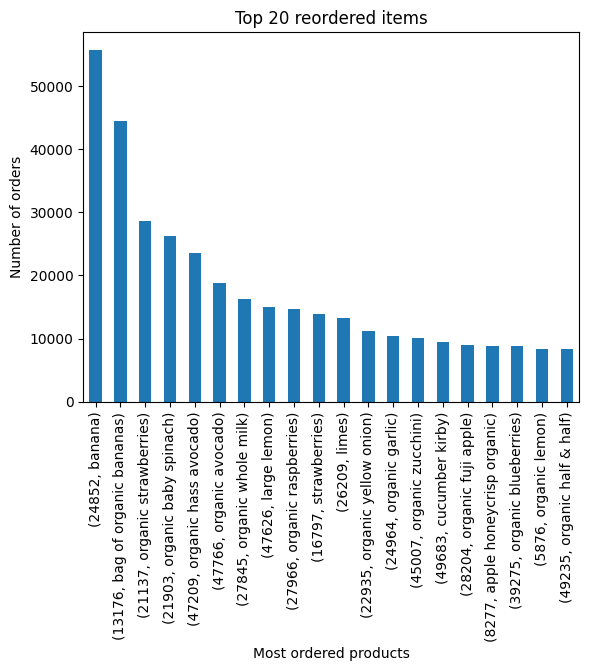

In [59]:
from matplotlib import pyplot as topre20
grp_reord_20.plot(title= 'Top 20 reordered items',
                kind='bar',
                xlabel="Most ordered products",
                ylabel= "Number of orders",
                )
topre20.show()


It looks like produce and dairy comprise the most reordered products as well. It makes sense that perishables would be the most reordered items.

### [C3] For each product, what proportion of its orders are reorders?

To calculate the proportion of orders for each product that are reorders:

1. **Merge the datasets**: Combine `order_products` with the `products` dataset to access product names and IDs in the same DataFrame.
2. **Group the data**: Group by `product_id` and `product_name` to isolate each product's order history.
3. **Calculate the mean of `reordered`**: Use `.mean()` on the `reordered` column to compute the proportion of orders for each product that were reorders. The value represents the reorder rate.
4. **Sort the results**: Use `.sort_values(ascending=False)` to rank products by their reorder rates.
5. **Convert to a DataFrame**: Use `.reset_index()` to organize the grouped data into a readable DataFrame.
6. **Optional Sorting**: Sort the results by `product_id` or another column for better clarity.

This approach provides insights into how frequently each product is reordered, helping identify customer favorites or staples.


In [60]:

#merge  order_products with the products
merge_ord_prod= order_products.merge(products, on='product_id')
#group product_id and product_name
grp_ord_prod = merge_ord_prod.groupby(['product_id', 'product_name'])['reordered'].mean()
#sort
sorted_reorder = grp_ord_prod.sort_values(ascending=False)

#print to verify data
print(sorted_reorder)


product_id  product_name                              
18121       jalapenos with sea salt                       1.0
27387       banana greek nonfat yogurt                    1.0
17773       quinoa- with olive oil                        1.0
49063       rosemary & sea salt crackers                  1.0
14935       kombucha blueberry basil                      1.0
                                                         ... 
25053       frost arctic blitz sports drink               0.0
25051       herb for beef gravy mix                       0.0
25045       bandages- waterproof                          0.0
25044       pure pacific mountain strawberry preserves    0.0
24793       sea salt- course                              0.0
Name: reordered, Length: 44516, dtype: float64


In [61]:
#convert to dataframe

sorted_reorder_df=sorted_reorder.reset_index()

In [62]:
#sort by product_id
sorted_by_id = sorted_reorder_df.sort_values(by='product_id')
print(sorted_by_id)

       product_id                                       product_name  \
11957           1                         chocolate sandwich cookies   
44430           2                                   all-seasons salt   
3746            3               robust golden unsweetened oolong tea   
14764           4  smart ones classic favorites mini rigatoni wit...   
17908           7                     pure coconut water with orange   
...           ...                                                ...   
38357       49684          vodka- triple distilled- twist of vanilla   
17853       49685                 en croute roast hazelnut cranberry   
8600        49686                                   artisan baguette   
38360       49687         smartblend healthy metabolism dry cat food   
34870       49688                             fresh foaming cleanser   

       reordered  
11957   0.564286  
44430   0.000000  
3746    0.738095  
14764   0.510204  
17908   0.500000  
...          ...  
38

### [C4] For each customer, what proportion of their products ordered are reorders?

To calculate the proportion of products reordered by each customer:

1. **Merge the datasets**: Combine `order_products` with `orders` to link order and customer information.
2. **Group the data**: Group by `user_id` to focus on each customer's ordering behavior.
3. **Calculate the mean of `reordered`**: Use `.mean()` on the `reordered` column to determine the proportion of products reordered by each customer.
4. **Sort the results**: Use `.sort_values(ascending=False)` to identify customers with the highest reorder rates.
5. **Convert to a DataFrame**: Use `.reset_index()` to format the grouped data into a structured DataFrame for further analysis.

This analysis reveals the extent to which individual customers reorder products, providing insights into customer loyalty and preferences.


In [63]:

# merge order_products with orders
mer_prod_ord= order_products.merge(orders, on='order_id')
#group by user_id and apply .mean() to reordered
grp_prod_ord= mer_prod_ord.groupby('user_id')['reordered'].mean()
#sort
grp_prod_ord=grp_prod_ord.sort_values(ascending=False)
#convert to DF
df_reorder_user=grp_prod_ord.reset_index()
#print to confimr
print(df_reorder_user)


        user_id  reordered
0        137587        1.0
1        173474        1.0
2         13918        1.0
3         62300        1.0
4         62307        1.0
...         ...        ...
149621   190953        0.0
149622   119371        0.0
149623    63173        0.0
149624    63163        0.0
149625   165726        0.0

[149626 rows x 2 columns]


### [C5] What are the top 20 items that people put in their carts first?

To identify the top 20 items that people most frequently add to their carts first:

1. **Merge the datasets**: Combine `order_products` with `products` to link product names and IDs.
2. **Filter the data**: Focus on rows where `add_to_cart_order` equals 1, indicating the first item added to the cart.
3. **Group the data**: Group by `product_id` and `product_name` to aggregate the count of how often each product was the first in a cart.
4. **Count occurrences**: Use `.count()` to calculate the total number of times each product was the first added.
5. **Sort the results**: Use `.sort_values(ascending=False)` to rank products by their first-in-cart frequency.
6. **Display the top 20**: Use `.head(20)` to extract the most popular first-in-cart items.

This provides insights into which products customers prioritize in their shopping process.


In [64]:
# merge order_products with products
mer_prod_ord= order_products.merge(products, on='product_id')
#filter add_to_cart_order ==1
first_product = mer_prod_ord[mer_prod_ord['add_to_cart_order'] == 1]
#Group by product_id and product_name and apply count
grp_first_product= first_product.groupby(['product_id','product_name'])['product_name'].count()
#sort
grp_first_product=grp_first_product.sort_values(ascending=False)
#find top 20
grp_first_product_20=grp_first_product.head(20)
#display
print(grp_first_product_20)


product_id  product_name               
24852       banana                         15562
13176       bag of organic bananas         11026
27845       organic whole milk              4363
21137       organic strawberries            3946
47209       organic hass avocado            3390
21903       organic baby spinach            3336
47766       organic avocado                 3044
19660       spring water                    2336
16797       strawberries                    2308
27966       organic raspberries             2024
44632       sparkling water grapefruit      1914
49235       organic half & half             1797
47626       large lemon                     1737
196         soda                            1733
38689       organic reduced fat milk        1397
26209       limes                           1370
12341       hass avocados                   1340
5785        organic reduced fat 2% milk     1310
27086       half & half                     1309
43352       raspberries      

The products that are most often placed into the cart first are produce, dairy, and beverages such as soda or water. I couldn't really say why that is without experience using Instacart because this could have more to do with app design than properties of the products. I do notice that there is considerable overlap between this result and the previous result for most popular and most reordered item types. It could simply be that the app prioritizes popular items as the first suggested purchases, so it happens to be more convenient for customers to place these items in their cart first.

<b> Conclusions </b>

The products most frequently placed first in customers’ carts are often fresh produce, dairy items, and beverages like soda and water. These categories also appear consistently among the most ordered and most reordered items. This overlap suggests that customers are not simply making one-off purchases, but rather returning to the app regularly for routine grocery needs.

Additionally, we observe that many reorders occur in weekly intervals—on days 7, 14, 21, and 30—which points to habitual purchasing behavior. This pattern strongly implies that customers have integrated Instacart into their ongoing grocery routines, using it not just as a convenience tool, but as a primary channel for restocking household essentials.

The first two days of the week stand out as the most popular times for placing orders, indicating that many customers plan their grocery shopping early in the week.


Looking at customer behavior, most users in the dataset have placed between 1 and 10 orders, with a steep drop-off after just a single order. This suggests that while many try the service, a smaller group becomes regular shoppers.


As for order size, the typical order contains about 5 or 6 items, with the majority of orders ranging anywhere from 1 to 20 items. This range reflects the mix of quick top-ups and fuller weekly shopping trips.
